Gregory Moore

In [1]:
#importing all the packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#loading the make moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise = 0.05, random_state=0)

In [3]:
#preprocessing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

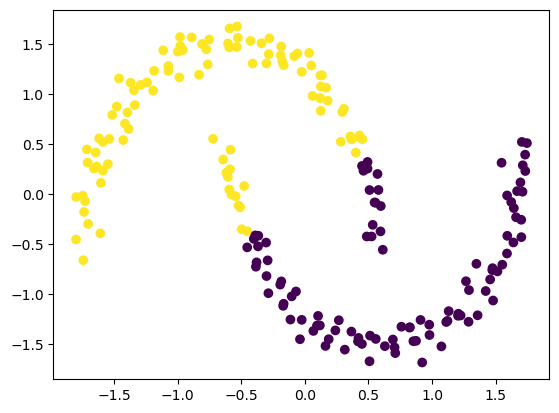

In [4]:
#implementing kmeans using sklearn library
# k-means fails at complex shapes of clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2,n_init = 10, random_state=0)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred)


In [5]:
#implement k-means from scratch 
# Lets do revision of the algorithm first

While PCA searches for a low dimensional representation of the dataset, Clustering methods search for homogeneous subgroups among the observations.

In K-means clustering, we define a desired number of clusters _K_ and assign each observation to one of the clusters.

**Rules:** 
* Each observation must be placed in at least one of the clusters
* No clusters may overlap, each observation can only be placed in a single cluster 
* The goal is to minimize the variance of observations within each of the clusters 


**Algorithm:**

Choose a values for your number of clusters _K_:

   * At random select _K_ points from your dataset and assign those to be *centroids*, cluster centers
   * Assign each data point to the closest centroid (use the Euclidean distance)
   * Re-compute the centroids using the currently assigned clusters
   * If a convergence criterion is not met, repeat steps 2 and  3

This algorithm corresponds to solving the problem

$$\underset{C_{1},...,C_{K}}{\text{minimize}}\sum_{j=1}^K\sum_{{\bf x}\in {\bf C}_j}d({\bf x},{\bf m}_j)^2$$

with 

$d({\bf x},{\bf m}_j)$ the Euclidean distance between data point x
and centroid $m_j$, $C_j$ the $j-$th cluster, and $m_j$
is the centroid of cluster $C_j$ i.e. the mean vector of all the
data points in $C_j$


First we will generate data, note that while we are generating $y$ - **the algorithm will never see it or know of its existence (unsupervised!)**

In [6]:
X,y = make_moons(n_samples=700, noise = 0.05, random_state=0)

In [7]:
#preprocessing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Now we randomly select some examples in X as our centroids

In [26]:
# First select 2 indices randomly 
import random
init_centroid_indices = random.choices(range(len(X)),k=2)
print(init_centroid_indices)

[643, 91]


In [27]:
# Now we use the indices to define the values of our centroids in terms of X
centroids = []
first_cent = X_scaled[init_centroid_indices[0]]
sec_cent = X_scaled[init_centroid_indices[1]]
centroids = [first_cent, sec_cent]
## approx three lines 
print(centroids)

[array([0.0407307 , 1.40888912]), array([1.81164868, 0.43262965])]


In [28]:
# Let's define a function to compute the Euclidean distance
def eucl_dist(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))
print(eucl_dist(X_scaled[0],centroids[0]))
print(eucl_dist(X_scaled[0],centroids[1]))

1.9422126252836334
3.3596427422702986


In [29]:
#Complete the `assigned_centroids` function below. 
#It aims to assign the centroid each point X belongs to, based on its distance the points in each centroid.
def assign_centroids(centroids, X_scaled):
    assigned_centroids = []
    for Xi in X_scaled:
        distance = []
        for Cj in centroids:
            distance.append(eucl_dist(Xi, Cj))
        assigned_centroids.append(np.argmin(distance))
    return assigned_centroids

assign_centroids(X_scaled,centroids)

[643, 91]

In [30]:
#Last function to implement is one to update the centroids based on the mean for features in each assigned centroid
def update_centroids(cluster, X):
    df = pd.DataFrame(X)
    df['Assigned Centroid'] = assign_centroids(centroids, X)
    new_centroids = df.groupby('Assigned Centroid').mean()
    new_centroids = np.array(new_centroids)
    return new_centroids

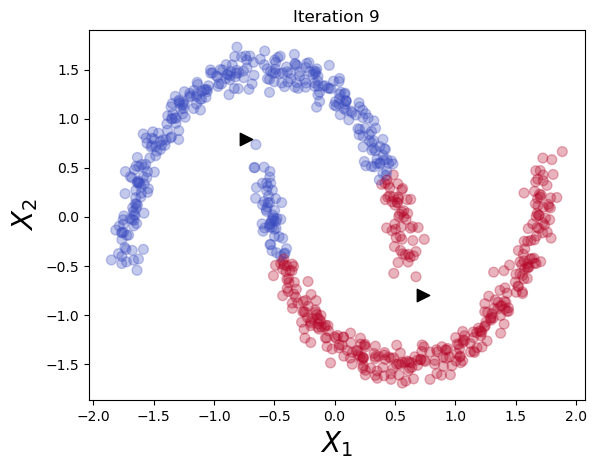

In [31]:
# checking your implementation 
%matplotlib inline
import time
import pylab as pl
from IPython import display

# For 10 iterations we will
for i in range(10):
    
    # Assign centroids
    assigned_centroids = assign_centroids(centroids, X_scaled)
    
    # Update the centroids using the means
    centroids = update_centroids(assigned_centroids, X_scaled)
    
    print("iteration ", i)
    for ct in centroids:
        print(str(ct[0]) +", "+str(ct[1]) )
    
    pl.clf()
    pl.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.3, c=assigned_centroids, s=50, cmap='coolwarm')
    pl.scatter(np.array(centroids)[:, 0], 
               np.array(centroids)[:, 1], 
               marker='>', color='black', s=80)
    pl.title('Iteration '+str(i))
    pl.xlabel('$X_1$', fontsize=20)
    pl.ylabel('$X_2$', fontsize=20)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(5)

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, assigned_centroids)

0.4974346304287528